# MOVIELENS DATASET #

## Title: Female and male count based on the genre ##

## All the imports we need ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## importing datafiles ##

In [2]:
u_user_df = pd.read_csv('/home/user/Downloads/ml-100k/u.user', 
                 names = ['user id', 'age', 'gender', 'occupation', 'zip code'], sep = '|', header = None)
u_data_df = pd.read_csv('/home/user/Downloads/ml-100k/u.data', 
                  names = ['user id', 'movie id', 'rating', 'timestamp'], sep = '\t', header = None)
u_item_df = pd.read_csv('/home/user/Downloads/ml-100k/u.item', 
                 names = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown',
                          'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 
                          'Drama', 'Fantasy', 'Film Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci Fi',
                          'Thriller', 'War', 'Western'], sep = '|', header = None, encoding = "ISO-8859-1")

# PART 1 #

##  Histogram of user count based on ratings ##

In [3]:
#conut of rating 
u_data_df_new = u_data_df.groupby(['user id']).rating.count()
Rating = list(u_data_df_new.index)
User_Id = u_data_df_new.tolist()

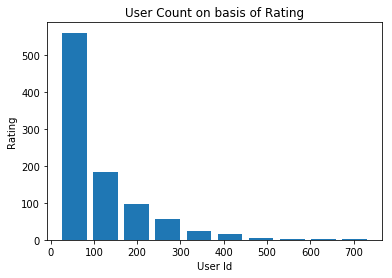

In [4]:
#plot
plt.hist(User_Id, histtype = 'bar', rwidth = 0.8)
plt.ylabel('Rating')
plt.xlabel('User Id')
plt.title('User Count on basis of Rating')
plt.show()

In [ ]:
# In this graph we can easily see that people with user ID less than 100 rated more movies as compared to the other.

In [5]:
%matplotlib inline

In [6]:
#u_data_df.groupby(['user id']).rating.count().plot(kind = 'hist',title = 'User count based on rating')


# PART 2 #

## Bar graph plot of user count based on age ##

In [7]:
u_user_df_new = u_user_df.groupby(['age']).count()['user id']
Age = list(u_user_df_new.index)
User_Count = u_user_df_new.tolist()

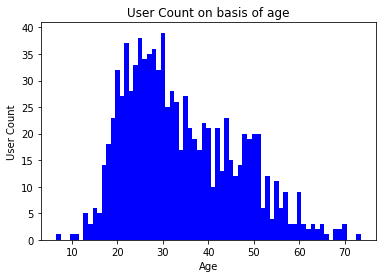

In [8]:
plt.bar(Age, User_Count, 1, color = "blue")
plt.ylabel('User Count')
plt.xlabel('Age')
plt.title('User Count on basis of age')
plt.show()

In [ ]:
# In this graph people between age 20-30 prefer to watch more movies as compared to other

# PART 3 #

## Filtering u.user file ##

In [9]:
data1 = u_user_df
data1.drop(['age', 'occupation', 'zip code'], axis = 1, inplace = True)
#data1.head()


## Filtering and sorting u.data file based on movie id##

In [10]:
data2 = u_data_df

data2.drop(['rating', 'timestamp'], axis = 1, inplace = True)
sorted_data2 = data2.sort_values('movie id')
#sorted_data2.head()

## Filtering u.item file and sorting based on movie id ##

In [11]:
data3 = u_item_df

data3.drop(['movie title', 'release date', 'video release date', 'IMDb URL', 'unknown'], axis = 1, inplace = True)
sorted_data3 = data3.sort_values('movie id')
#sorted_data3.head()

## Merging Data ##

In [12]:
merge1 = sorted_data2.merge(data1)
merge2 = merge1.merge(sorted_data3)
sorted_final = merge2.sort_values('movie id')
#sorted_final.head()

## Stacked Bar chart of male and female user on the based on genre ##

In [13]:
#Creating new DataFrame
genre = ['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
         'Film Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci Fi', 'Thriller', 'War', 'Western']
Count = ['Male', 'Female']
countsdf = pd.DataFrame(index = genre, columns = Count)

In [14]:
#Iterating and fillling the new dataframe
for i in range(len(genre)):
    s = sorted_final.groupby('gender')[genre[i]].sum().tolist()
    countsdf.loc[genre[i], 'Male'] = s[0]
    countsdf.loc[genre[i], 'Female'] = s[1]
#countsdf.head()

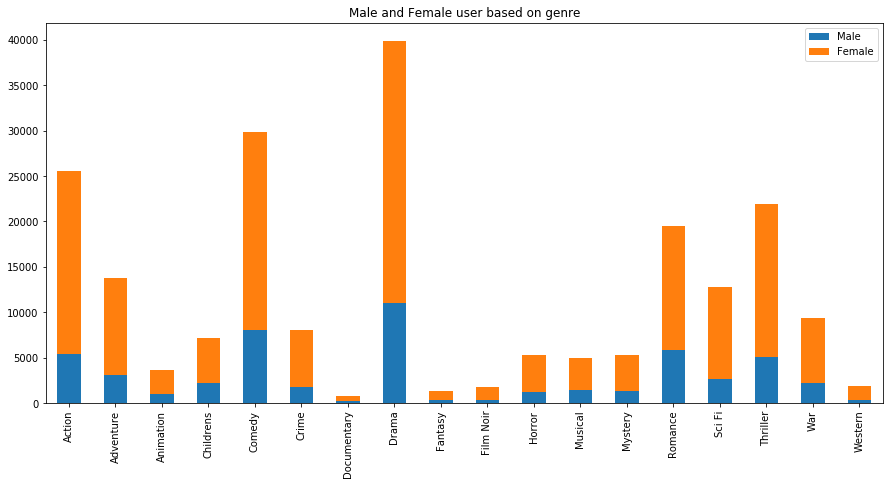

In [18]:
#Stacked plot of data
countsdf.plot(kind = 'bar', stacked = True, title = 'Male and Female user based on genre', figsize=(15,7))

In [ ]:
# from this stacked bar we can see that people prefer to watch Drama movies more compared to other genre.